#Problem Statement:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


#EDA

In [118]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [119]:
data.shape

(400, 11)

In [120]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [121]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [122]:
data.duplicated().sum()

0

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [124]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [125]:
data.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [126]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [127]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [128]:
data['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [129]:
data['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [130]:
#converting sales into categorical variable
len(data[data['Sales']<=10])

322

In [131]:
len(data[(data['Sales']>10) & (data['Sales']<=17) ])

78

In [132]:
#dividing sales into 2 categories,
#category 1 when sales is <=10 and
#2 when sales is greater than 10 and less than or equal to 17
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Sales_category']=data['Sales'].apply(lambda x: 1 if 0<=x<=10 else 2 if 10<x<=17 else 0)
data['ShelveLoc']=label.fit_transform(data['ShelveLoc'])
data['Urban']=label.fit_transform(data['Urban'])
data['US']=label.fit_transform(data['US'])


In [133]:
data.head()            #(Shelveloc = 0:Bad, 1:Good, 2:Medium ), (US = 0:NO, 1:YES), (Urban = 0:NO, 1:YES)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,2
2,10.06,113,35,10,269,80,2,59,12,1,1,2
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [134]:
len(data[data['Sales_category']==1])

322

In [135]:
len(data[data['Sales_category']==2])

78

In [136]:
len(data[data['Sales_category']==0])

0

In [137]:
data=data.drop('Sales', axis=1)

In [138]:
data.shape

(400, 11)

In [139]:
data.dtypes

CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban             int64
US                int64
Sales_category    int64
dtype: object

In [140]:
data['CompPrice'].skew()

-0.04275457528359782

In [141]:
data['Income'].skew()

0.04944448796161163

In [142]:
data['Advertising'].skew()  #shows possitive skewness

0.6395857712012682

In [143]:
data['Population'].skew()

-0.05122663813815477

In [144]:
data['Price'].skew()

-0.12528619394494211

In [145]:
data['Age'].skew()

-0.07718173189535066

In [146]:
data['Education'].skew()

0.044006827429473115

#Visualization

In [147]:
data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_category'],
      dtype='object')

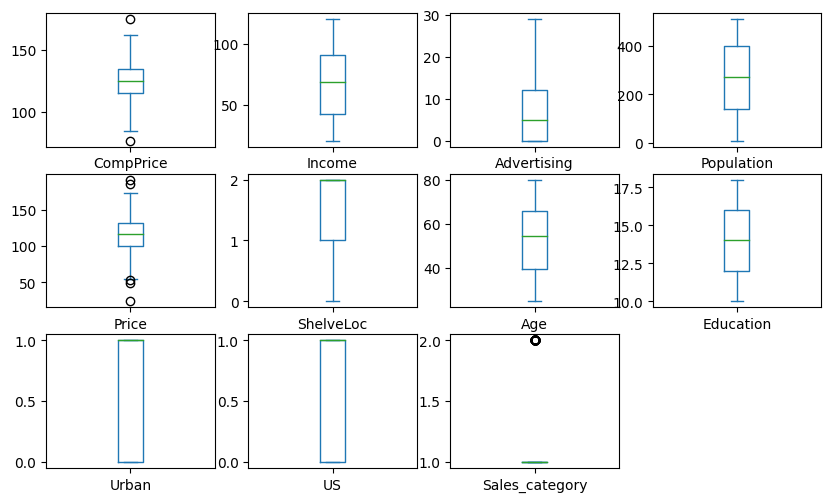

In [148]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8))
plt.show();

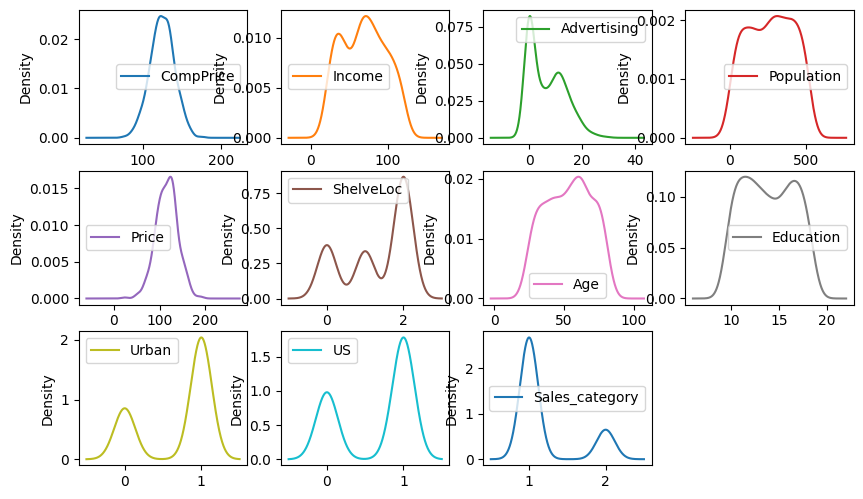

In [149]:
data.plot(kind='density', subplots=True, sharex=False,layout=(4,4), figsize=(10,8))
plt.show();

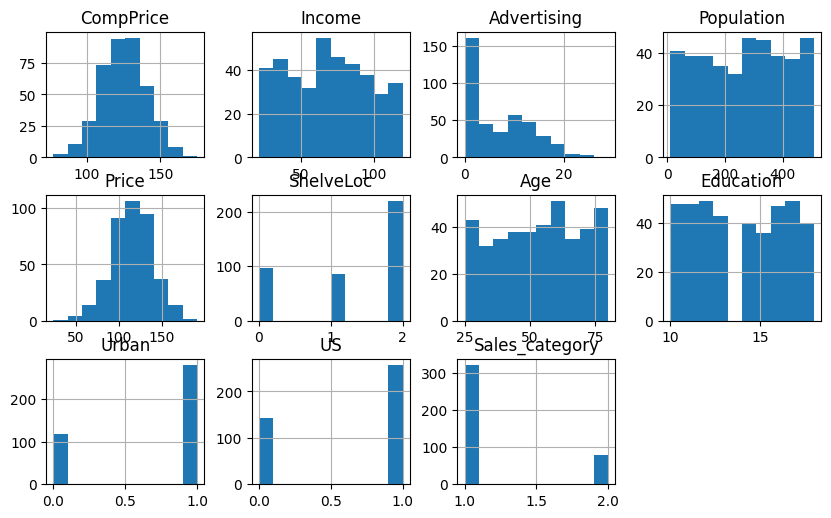

In [150]:
data.hist(layout=(4,4), figsize=(10,8))
plt.show();

In [151]:
data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_category'],
      dtype='object')

<Axes: xlabel='ShelveLoc'>

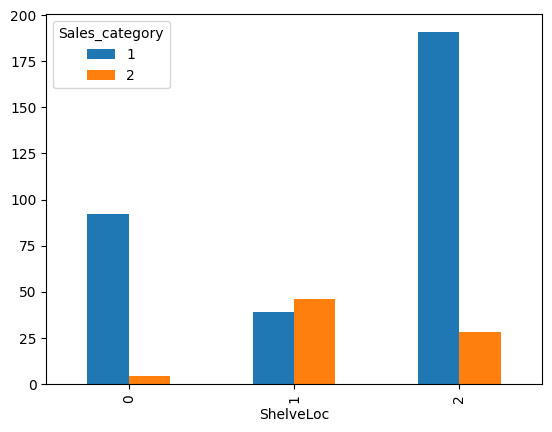

In [152]:
pd.crosstab(data['ShelveLoc'], data['Sales_category']).plot(kind='bar')

<Axes: xlabel='Sales_category'>

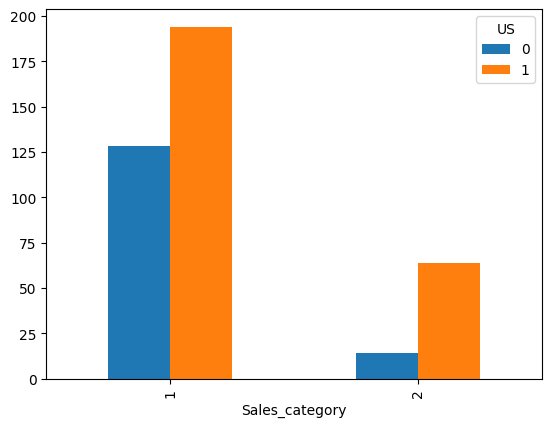

In [153]:
pd.crosstab(data['Sales_category'], data['US']).plot(kind='bar')

<Axes: xlabel='Sales_category'>

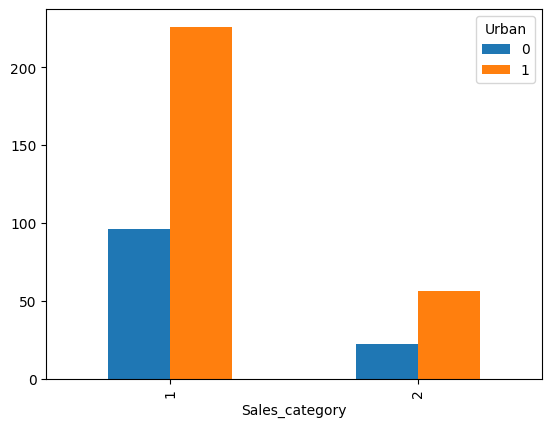

In [154]:
pd.crosstab(data['Sales_category'], data['Urban']).plot(kind='bar')

<Axes: ylabel='Sales_category'>

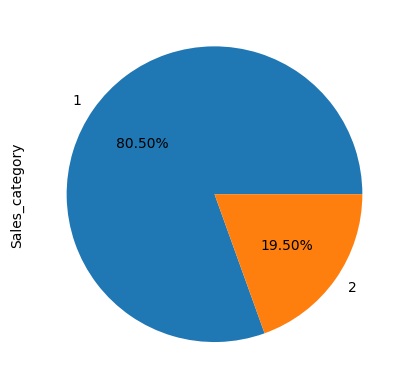

In [155]:
data['Sales_category'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='ShelveLoc'>

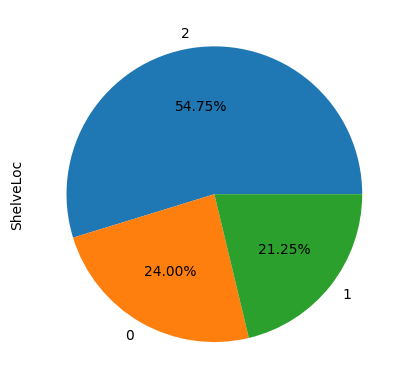

In [156]:
data['ShelveLoc'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='US'>

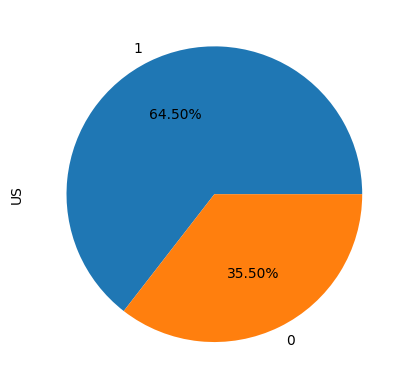

In [157]:
data['US'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='Urban'>

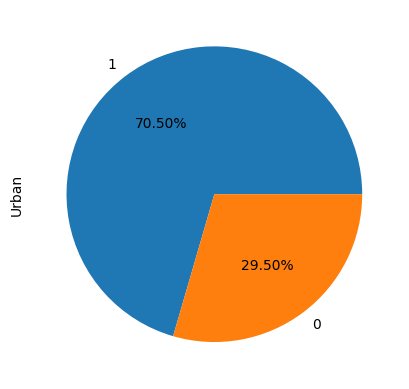

In [158]:
data['Urban'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#scaling values

In [159]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [160]:
data['Advertising']=np.sqrt(data['Advertising'])

In [161]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,3.316625,276,120,0,42,17,1,1,1
1,111,48,4.000000,260,83,1,65,10,1,1,2
2,113,35,3.162278,269,80,2,59,12,1,1,2
3,117,100,2.000000,466,97,2,55,14,1,1,1
4,141,64,1.732051,340,128,0,38,13,1,0,1


In [162]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['CompPrice','Income','Advertising','Population','Price','Age','Education']]=scaler.fit_transform(data[['CompPrice','Income','Advertising','Population','Price','Age','Education']])

In [163]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,0.850455,0.155361,0.811332,0.075819,0.177823,0,-0.699782,1.184449,1,1,1
1,-0.912484,-0.739060,1.224702,-0.032882,-1.386854,1,0.721723,-1.490113,1,1,2
2,-0.781896,-1.204159,0.717968,0.028262,-1.513719,2,0.350895,-0.725953,1,1,2
3,-0.520720,1.121336,0.014912,1.366649,-0.794814,2,0.103677,0.038208,1,1,1
4,1.046337,-0.166631,-0.147169,0.510625,0.516132,0,-0.947000,-0.343872,1,0,1


In [164]:
data['Advertising'].skew()  # before applying square-root on Advertising , skewness was 0.63

-0.056663767600610135

In [165]:
data.isna().sum()

CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_category    0
dtype: int64

#Model building

In [166]:
X=data.drop('Sales_category', axis=1)
Y=data['Sales_category']

In [167]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.811332,0.075819,0.177823,0,-0.699782,1.184449,1,1
1,-0.912484,-0.739060,1.224702,-0.032882,-1.386854,1,0.721723,-1.490113,1,1
2,-0.781896,-1.204159,0.717968,0.028262,-1.513719,2,0.350895,-0.725953,1,1
3,-0.520720,1.121336,0.014912,1.366649,-0.794814,2,0.103677,0.038208,1,1
4,1.046337,-0.166631,-0.147169,0.510625,0.516132,0,-0.947000,-0.343872,1,0


In [168]:
Y.head()

0    1
1    2
2    2
3    1
4    1
Name: Sales_category, dtype: int64

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
max_features=range(1,11)
criterion=['entropy','gini']
param_grid=dict(max_features=max_features, criterion=criterion)
model=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
grid=GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_features': 10}
0.8800000000000001


In [170]:
model=RandomForestClassifier(n_estimators=100, max_features=10, oob_score=True, criterion='entropy', random_state=0)
model.fit(X,Y)

RandomForestClassifier(criterion='entropy', max_features=10, oob_score=True,
                       random_state=0)

In [171]:
pred=model.predict(X)

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, pred)

array([[322,   0],
       [  0,  78]])

In [173]:
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       322
           2       1.00      1.00      1.00        78

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [174]:
len(model.estimators_)

100

In [175]:
model.classes_

array([1, 2])

In [176]:
model.n_classes_

2

In [177]:
model.oob_score_

0.8625

In [178]:
model.feature_importances_

array([0.12528146, 0.10212526, 0.11258245, 0.07102888, 0.22687009,
       0.18764808, 0.11595536, 0.04317673, 0.00975965, 0.00557205])

In [179]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [180]:
model1=RandomForestClassifier(n_estimators=100, max_features=10, criterion='entropy', oob_score=True, random_state=0)
model1.fit(X_train, Y_train)
model1.oob_score_

0.865625

In [181]:
pred_train=model1.predict(X_train)
acc_train=accuracy_score(Y_train, pred_train)
acc_train

1.0

In [182]:
pred_test=model1.predict(X_test)
acc_test=accuracy_score(Y_test, pred_test)
acc_test

0.85

In [183]:
#model validation
model=RandomForestClassifier(n_estimators=100, max_features=10, oob_score=True, criterion='entropy', random_state=0)
kf=KFold(n_splits=10)
results=cross_val_score(model, X,Y, cv=kf)
results.mean()*100

87.75

In [184]:
# INFERENCE: the sales feature was converted into 2 categories and grid search cv was applied to best criterion and max_fetaures to apply Random Forest classifier technique
# used entropy as a criterion and max_features of 10 and oob_score of 86.5% is obtained

#Problem 2 : Use Random Forest to prepare a model on fraud data

In [185]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


#EDA

In [186]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [187]:
data.shape

(600, 6)

In [188]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [190]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [191]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [192]:
data.duplicated().sum()

0

In [193]:
data['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [194]:
data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [195]:
data['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [196]:
data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Undergrad']=label.fit_transform(data['Undergrad'])
data['Marital.Status']=label.fit_transform(data['Marital.Status'])
data['Urban']=label.fit_transform(data['Urban'])

In [198]:
data.head()        #(Undegrad= 0: NO, 1:YES) , (Marital.Status = 0:Divorced, 1: Married, 2:Single) , (Urban= 0: NO, 1: YES)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [199]:
#convering Taxable.Income into categorical variable
#Taxable.Income <=30000 : 0(RISKY) , Taxable.Income >30000 : 1(GOOD)
data['Taxable.Income'] =data['Taxable.Income'].apply(lambda x: 0 if x<=30000 else 1)

In [200]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [201]:
data[['City.Population','Work.Experience']] =scaler.fit_transform(data[['City.Population','Work.Experience']])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,0.139472,0.333333,1
1,1,0,1,0.622394,0.600000,1
2,0,1,1,0.772568,1.000000,1
3,1,2,1,0.962563,0.500000,1
4,0,1,1,0.010081,0.933333,0


#Visualization

<Axes: xlabel='Taxable.Income'>

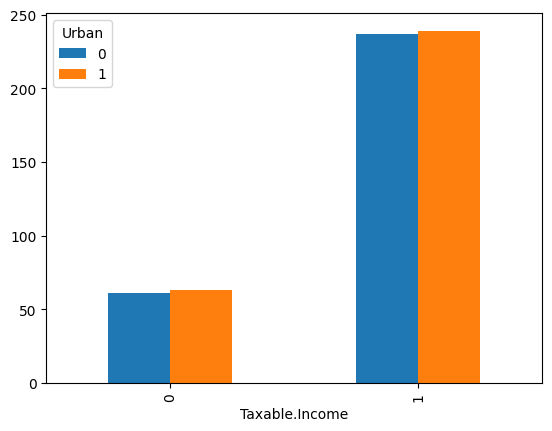

In [202]:
pd.crosstab(data['Taxable.Income'], data['Urban']).plot(kind='bar')

<Axes: xlabel='Taxable.Income'>

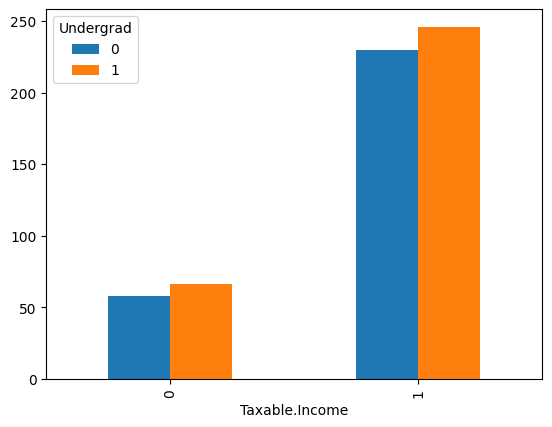

In [203]:
pd.crosstab(data['Taxable.Income'], data['Undergrad']).plot(kind='bar')

<Axes: xlabel='Taxable.Income'>

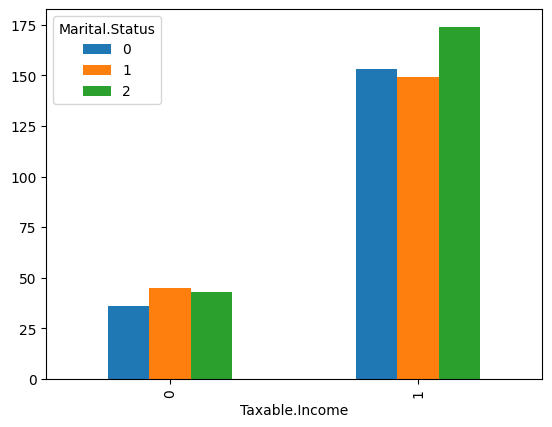

In [204]:
pd.crosstab(data['Taxable.Income'], data['Marital.Status']).plot(kind='bar')

<Axes: >

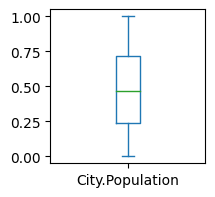

In [205]:
data['City.Population'].plot(kind='box', figsize=(2,2))

<Axes: >

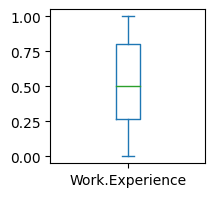

In [206]:
data['Work.Experience'].plot(kind='box', figsize=(2,2))

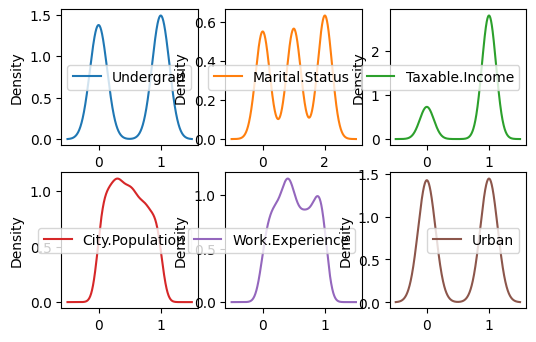

In [207]:
data.plot(kind='density', subplots=True, layout=(3,3), figsize=(6,6), sharex=False)
plt.show();

In [208]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

<Axes: ylabel='Taxable.Income'>

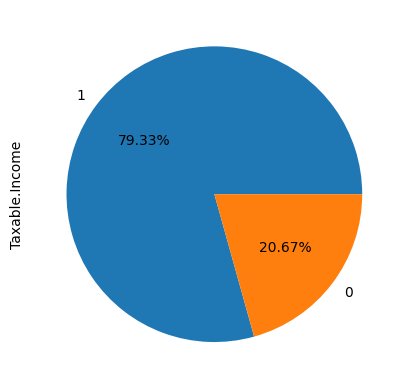

In [209]:
data['Taxable.Income'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#Model Buildiong

In [210]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,0.139472,0.333333,1
1,1,0,1,0.622394,0.600000,1
2,0,1,1,0.772568,1.000000,1
3,1,2,1,0.962563,0.500000,1
4,0,1,1,0.010081,0.933333,0


In [211]:
X=data.drop('Taxable.Income', axis=1)
Y=data['Taxable.Income']

In [212]:
X.shape

(600, 5)

In [213]:
Y.shape

(600,)

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
max_features=range(1,6)
criterion=['entropy','gini']
max_depth=range(1,11)
param_grid=dict(max_features=max_features,criterion=criterion , max_depth=max_depth)
model=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=40)
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=40),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 11),
                         'max_features': range(1, 6)})

In [215]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 1}
0.7949999999999999


In [216]:
model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=6, max_features=1, oob_score=True, random_state=40)
model.fit(X,Y)

RandomForestClassifier(max_depth=6, max_features=1, oob_score=True,
                       random_state=40)

In [217]:
model.oob_score_

0.795

In [218]:
model.classes_

array([0, 1])

In [219]:
model.feature_importances_

array([0.0369128 , 0.07442921, 0.48531383, 0.36189381, 0.04145035])

In [220]:
X.head(1)            # imp features City.Population=48%, and Work.Experience=36%

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,0.139472,0.333333,1


In [221]:
len(model.estimators_)

100

In [222]:
pred=model.predict(X)
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y, pred)
acc

0.81

In [223]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15       124
           1       0.81      1.00      0.89       476

    accuracy                           0.81       600
   macro avg       0.90      0.54      0.52       600
weighted avg       0.85      0.81      0.74       600



In [224]:
confusion_matrix(Y,pred)

array([[ 10, 114],
       [  0, 476]])

In [225]:
#model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=6, max_features=1, oob_score=True, random_state=40)
Kf=KFold(n_splits=10)
result=cross_val_score(model, X,Y, cv=kf)
result.mean()*100

79.33333333333333

In [226]:
# trying with different parameters
model1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3, max_features=3, oob_score=True, random_state=40)
model1.fit(X,Y)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=3,
                       oob_score=True, random_state=40)

In [227]:
model1.oob_score_


0.7933333333333333

In [228]:
pred1=model1.predict(X)
acc1=accuracy_score(Y, pred)
acc1

0.81

In [229]:
# even with different parameters the oob_score remained almost to 79% with accuracy of 81%